In [2]:
import numpy as np
import pandas as pd

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df_stores = pd.read_csv('/content/stores data-set.csv')
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [11]:
df_features = pd.read_csv('/content/Features data set.csv')
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
df_sales = pd.read_csv('/content/sales data-set.csv')
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [15]:
df_stores_features = df_stores.merge(right = df_features, on = 'Store')

df_merge = df_stores_features.merge(right = df_sales, on = ['Store', 'Date', 'IsHoliday'])
df_merge.sample(10)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
133272,14,A,200898,01/07/2011,74.04,3.748,NaN,NaN,NaN,NaN,NaN,185.911989,8.625,False,98,17797.64
90904,10,B,126512,24/12/2010,57.06,3.236,NaN,NaN,NaN,NaN,NaN,126.983581,9.003,False,26,34361.70
316443,33,A,39690,18/02/2011,62.03,3.430,NaN,NaN,NaN,NaN,NaN,127.995250,8.951,False,94,29794.27
297822,31,A,203750,11/03/2011,54.69,3.459,NaN,NaN,NaN,NaN,NaN,213.764640,8.028,False,98,10244.49
167343,18,B,120653,05/02/2010,21.33,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,9.202,False,17,19325.72
41005,5,B,34875,18/06/2010,83.91,2.637,NaN,NaN,NaN,NaN,NaN,212.011977,6.465,False,32,2378.25
251658,26,A,152513,03/06/2011,60.49,3.973,NaN,NaN,NaN,NaN,NaN,134.855161,7.818,False,44,3117.12
376286,40,A,155083,22/07/2011,73.34,3.882,NaN,NaN,NaN,NaN,NaN,135.873839,4.584,False,54,33.52
190570,20,A,203742,17/12/2010,24.07,3.140,NaN,NaN,NaN,NaN,NaN,204.632119,7.484,False,41,15397.84
349621,37,C,39910,29/04/2011,76.10,3.810,NaN,NaN,NaN,NaN,NaN,214.358097,8.300,False,3,1044.89


In [18]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Date          421570 non-null  object 
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday     421570 non-null  bool   
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [20]:
df_merge.describe()

,Store,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,44.260317,15981.258123
std,12.785297,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,30.492054,22711.183519
min,1.000000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,1.000000,-4988.940000
25%,11.000000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,18.000000,2079.650000
50%,22.000000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,37.000000,7612.030000
75%,33.000000,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,74.000000,20205.852500
max,45.000000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000


In [33]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

<ipython-input-24-f24cf291890e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_temp.corr(),annot=True)


<Axes: >

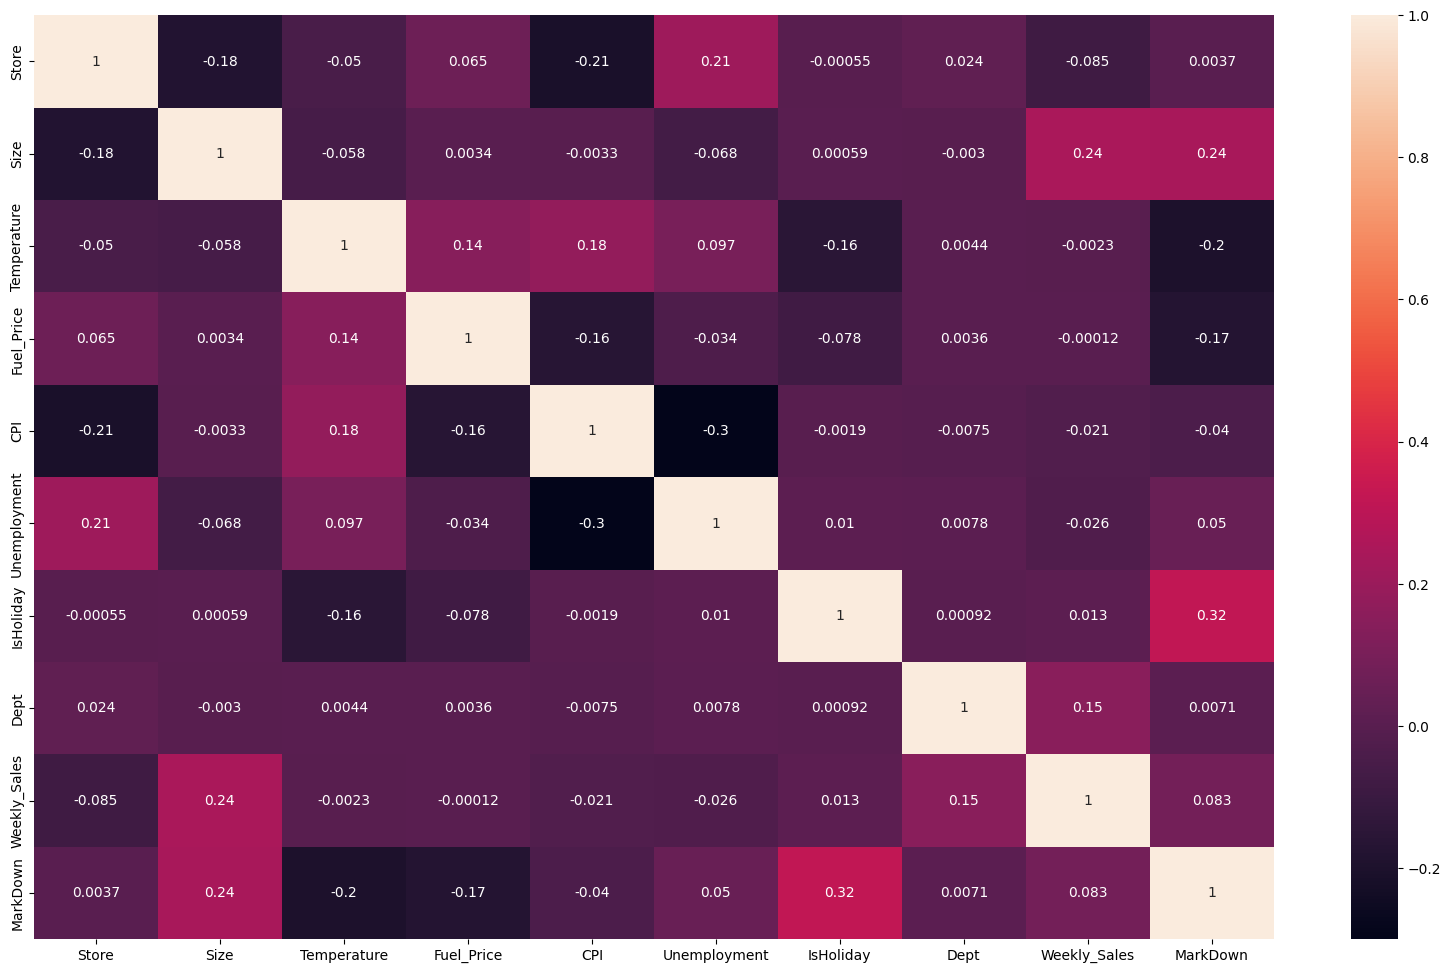

In [24]:
df_temp = df_merge.copy(deep = True)
df_temp['MarkDown'] = df_temp['MarkDown1'] + df_temp['MarkDown2'] + df_temp['MarkDown3']  +df_temp['MarkDown4'] + df_temp['MarkDown5']
df_temp.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace = True, axis = 1)
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_temp.corr(),annot=True)

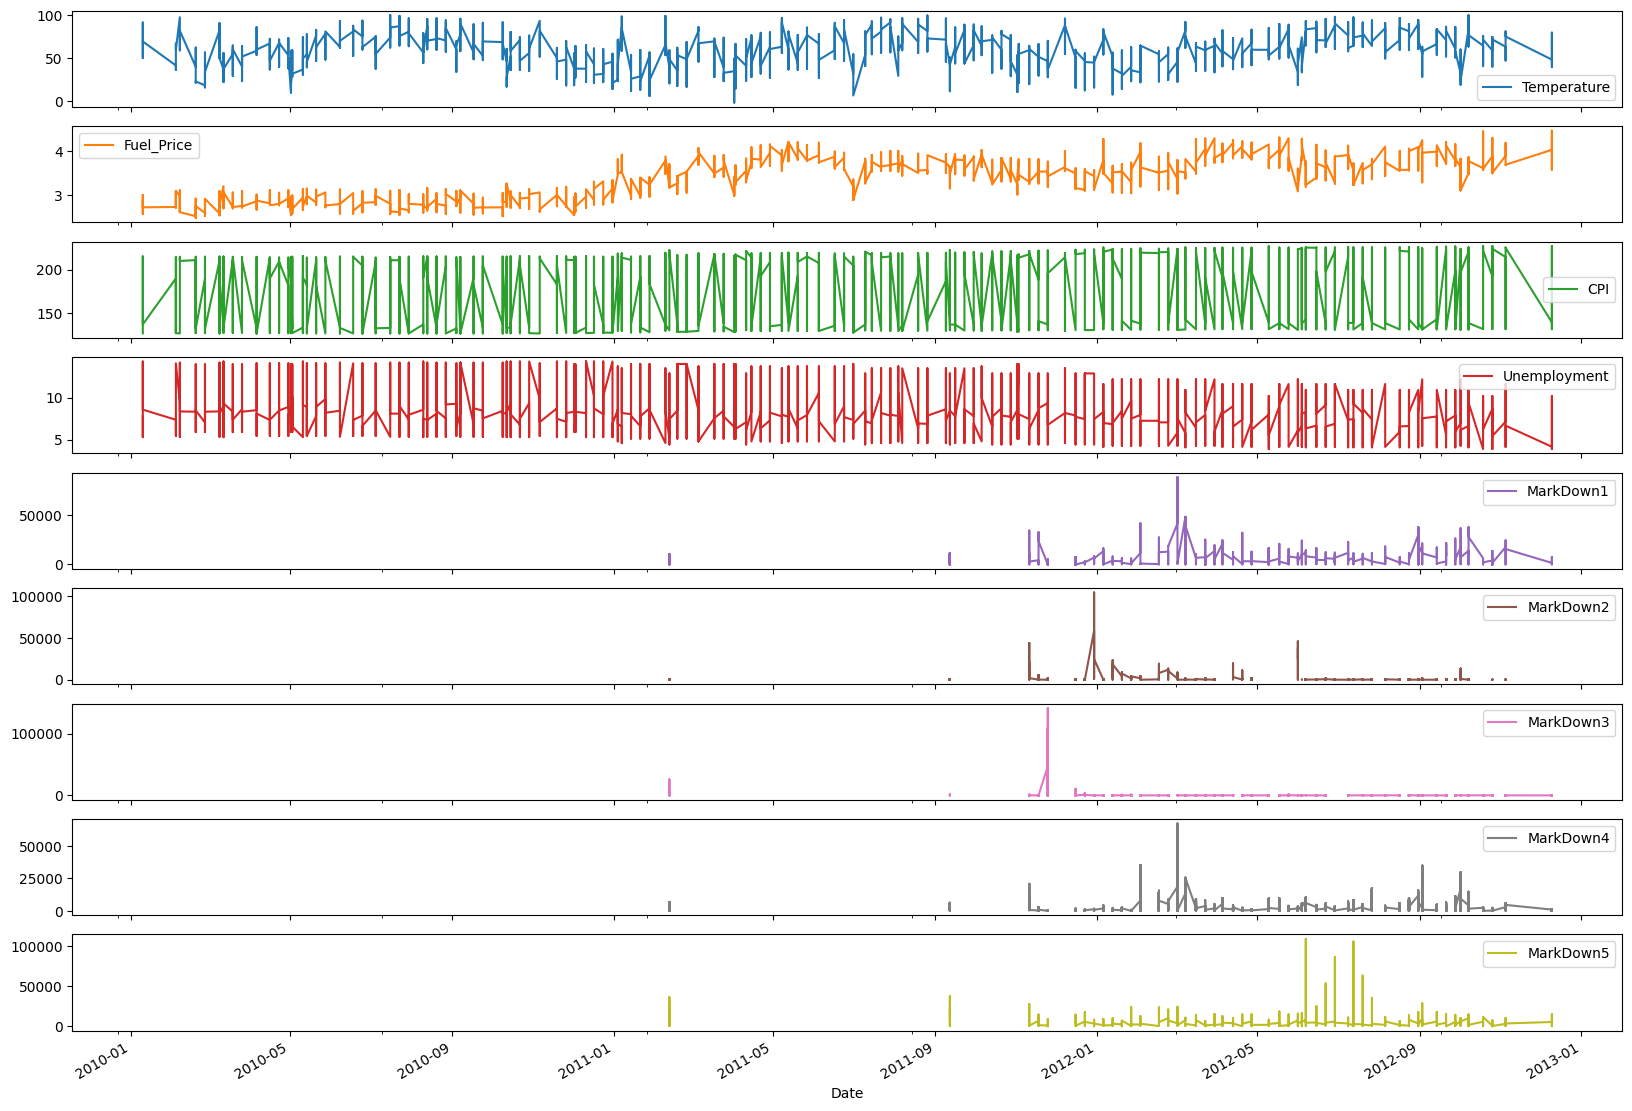

In [26]:
df_merge[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

<ipython-input-27-910cb0ff411f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df_merge.groupby('Date').sum()['Weekly_Sales'].reset_index()


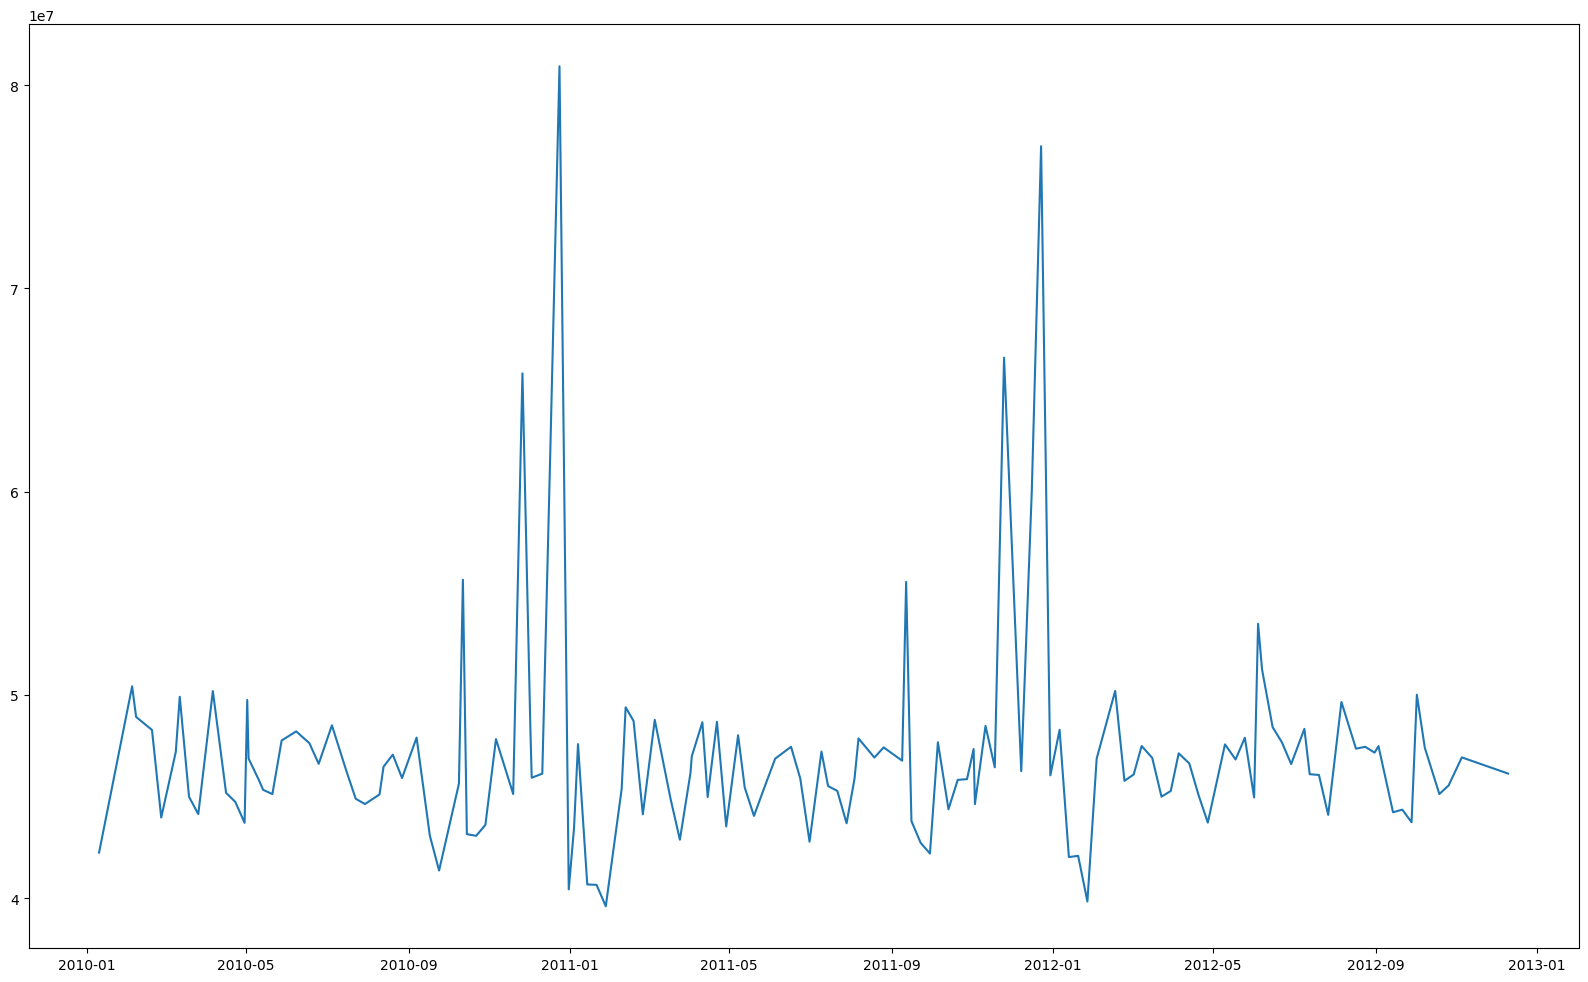

In [27]:
df_temp = df_merge.groupby('Date').sum()['Weekly_Sales'].reset_index()
fig, ax = plt.subplots(figsize=(20,12))
ax.plot('Date', 'Weekly_Sales', data=df_temp)

In [34]:
df_merge.Date.apply(lambda x: x.month)

0          5
1          5
2          5
3          5
4          5
          ..
421565    10
421566    10
421567    10
421568    10
421569    10
Name: Date, Length: 421570, dtype: int64

<ipython-input-36-f736f268a537>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df_merge.groupby(df_merge.Date.apply(lambda x: x.month)).sum()['Weekly_Sales'].reset_index()


Text(0, 0.5, 'Sales')

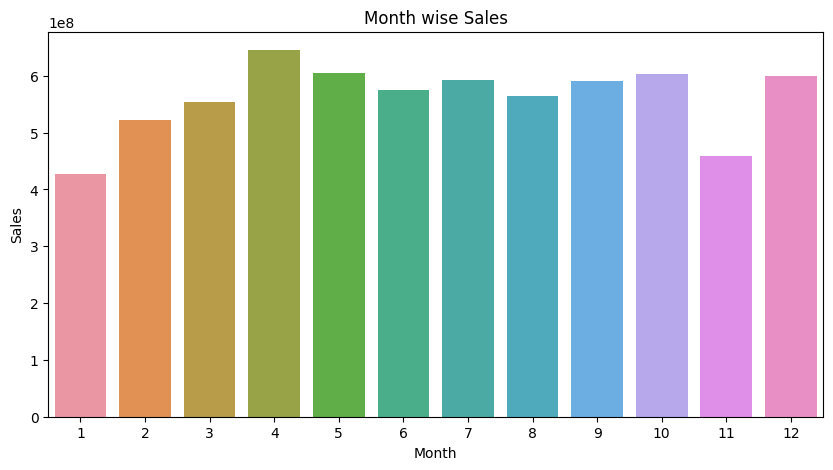

In [36]:
df_temp = df_merge.groupby(df_merge.Date.apply(lambda x: x.month)).sum()['Weekly_Sales'].reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=df_temp.Date,y=df_temp.Weekly_Sales)
plt.title("Month wise Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

<ipython-input-37-33d04b9187fb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df_merge.groupby('Type').sum()['Weekly_Sales'].reset_index()


<BarContainer object of 3 artists>

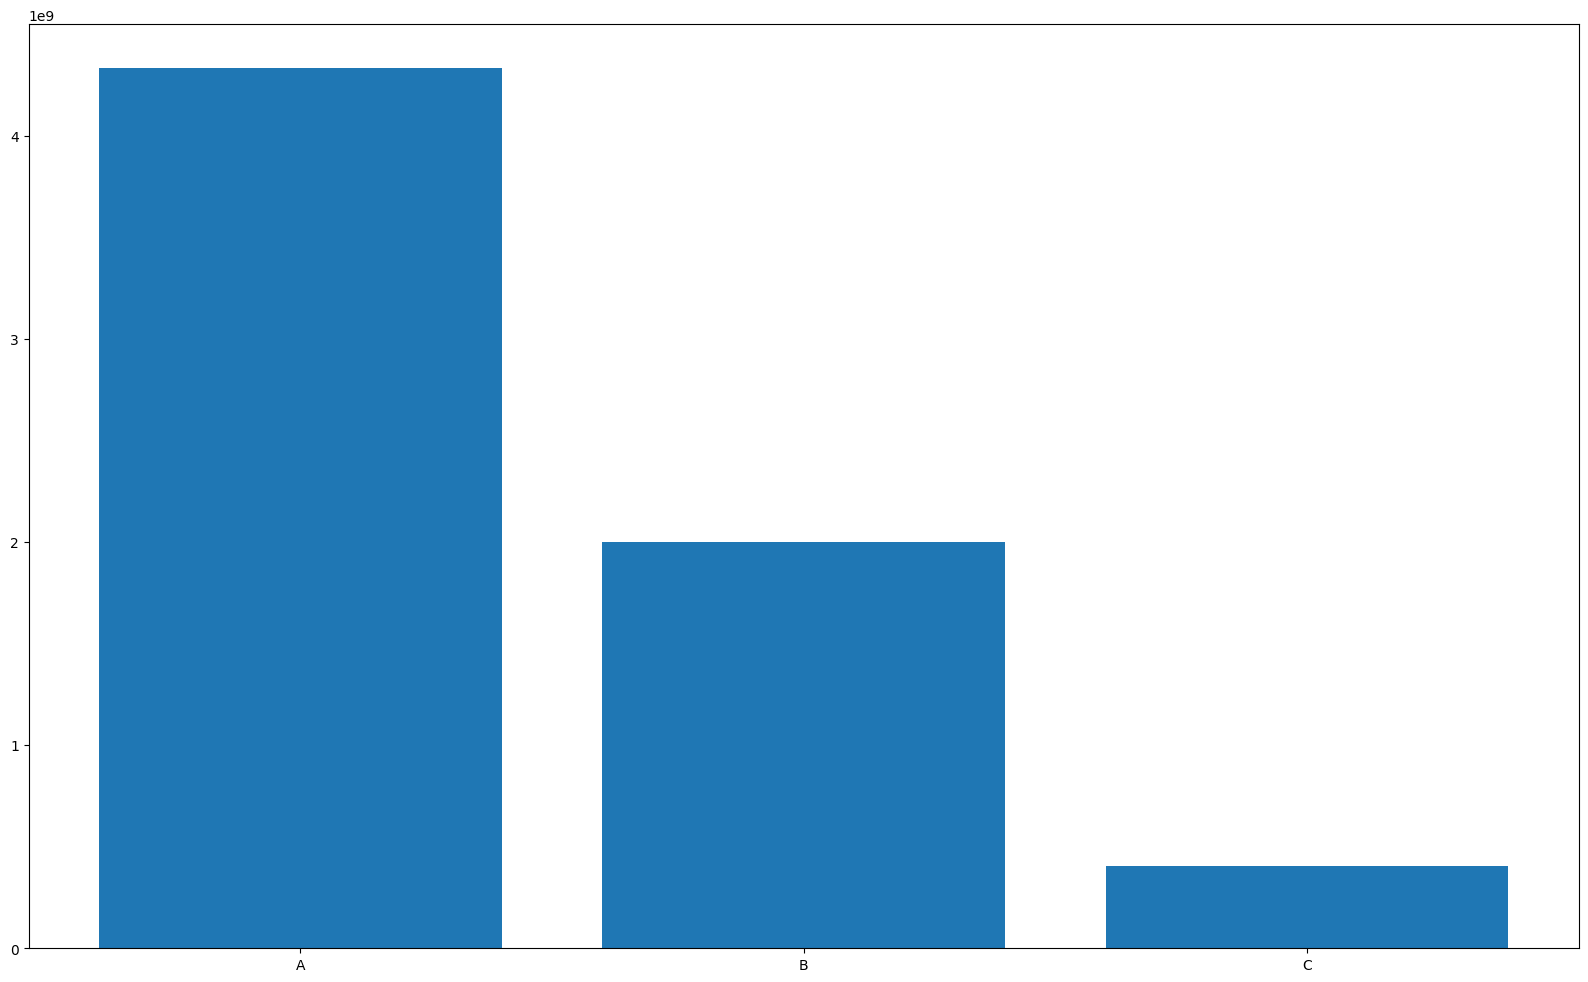

In [37]:
df_temp = df_merge.groupby('Type').sum()['Weekly_Sales'].reset_index()
fig, ax = plt.subplots(figsize=(20,12))
ax.bar('Type', 'Weekly_Sales', data=df_temp)